<a href="https://colab.research.google.com/github/hamasakram/AutoML/blob/main/Blood_Donation_Prediction_tpot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
!pip install tpot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import learning_curve



**Loading Dataset**

In [ ]:
df=pd.read_csv("transfusion.csv")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


**Checking for columns**

In [ ]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

**Finding Missing Values**|

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


**EDA**

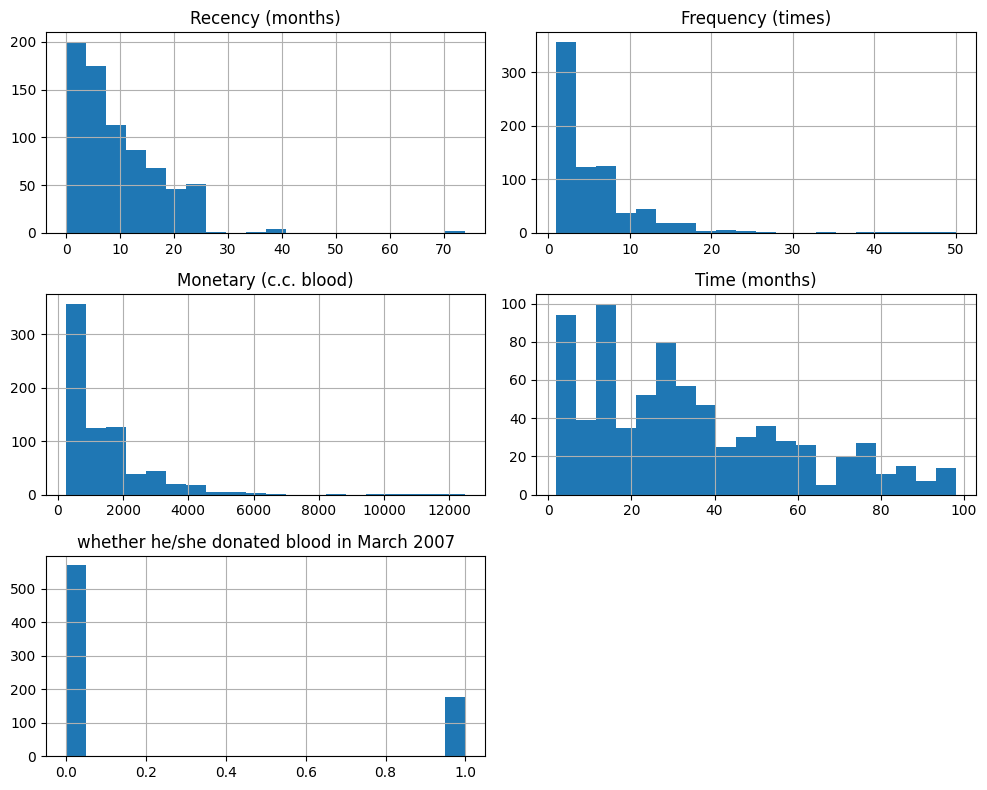

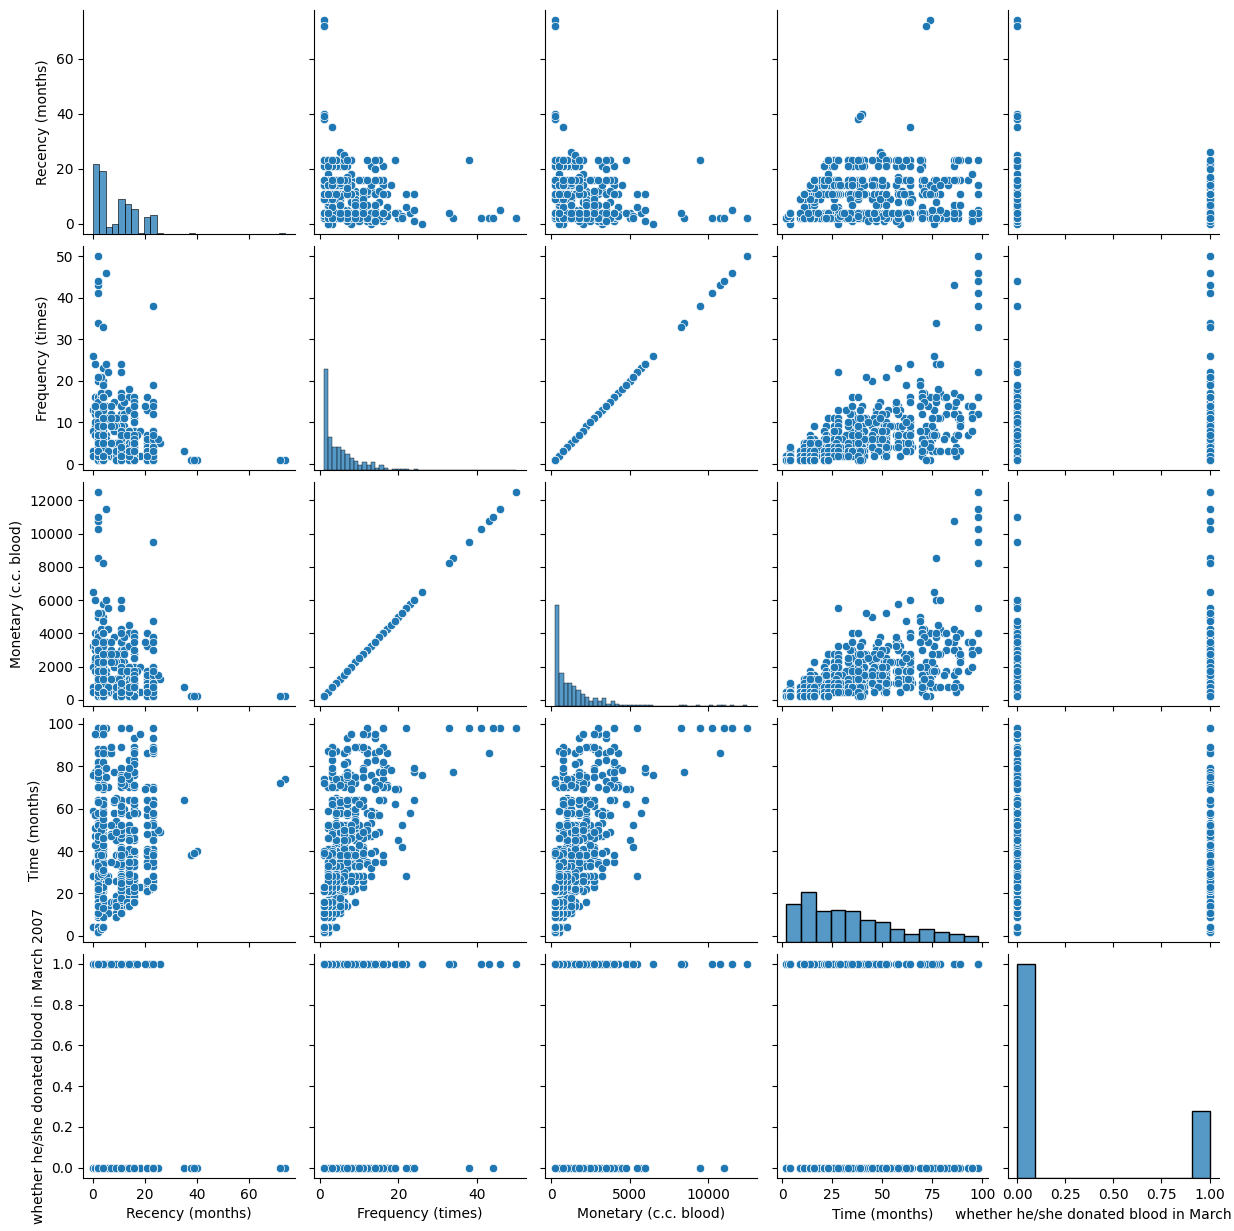

In [ ]:
# Plot histograms for all numerical columns
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Or use seaborn for a more advanced visualization
sns.pairplot(df)
plt.show()

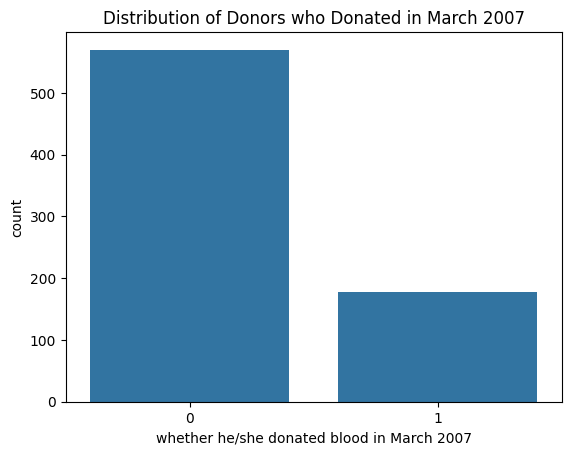

In [ ]:
# Plot the distribution of categorical variables
sns.countplot(x='whether he/she donated blood in March 2007', data=df)
plt.title('Distribution of Donors who Donated in March 2007')
plt.show()


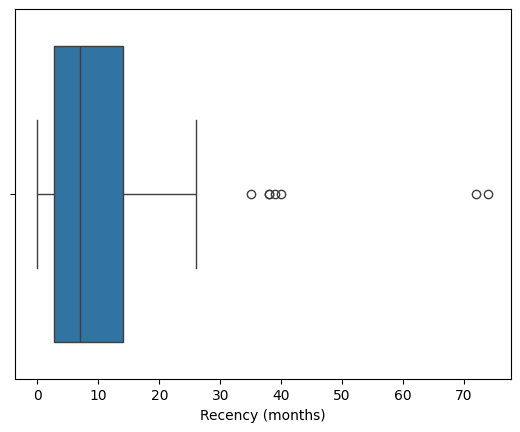

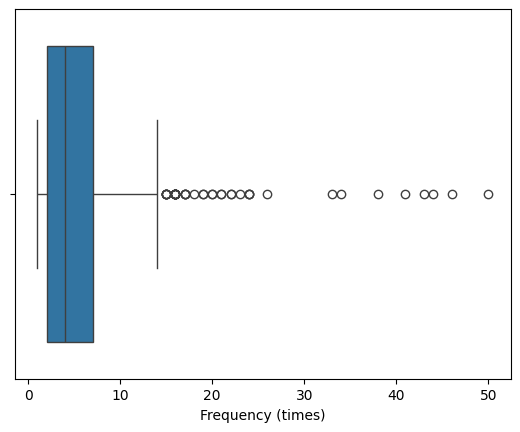

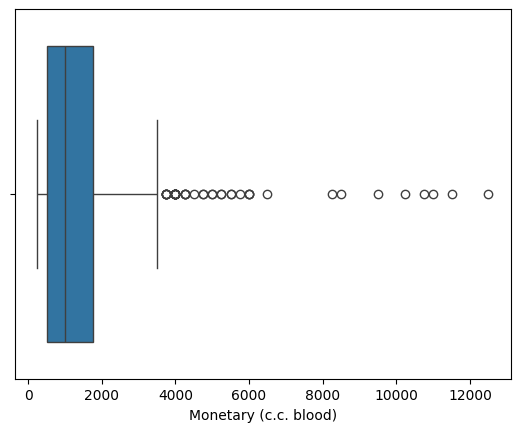

In [ ]:
# Box plot for Recency
sns.boxplot(x=df['Recency (months)'])
plt.show()

# Box plot for Frequency
sns.boxplot(x=df['Frequency (times)'])
plt.show()

# Box plot for Monetary
sns.boxplot(x=df['Monetary (c.c. blood)'])
plt.show()




**Fixing the Skewed Dataset Distribution**

In [ ]:
!pip install imbalanced-learn

In [ ]:


# Assume 'data' is your DataFrame and 'X' features, 'y' is the target
X = df.drop('whether he/she donated blood in March 2007', axis=1)
y = df['whether he/she donated blood in March 2007']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_smote.value_counts())


whether he/she donated blood in March 2007
1    457
0    457
Name: count, dtype: int64


**Normalization of data**

**Initializing TPOT**

In [ ]:
!pip install tpot

In [ ]:

# Initialize TPOT classifier
# The parameters can be adjusted depending on your dataset size, the desired thoroughness of the search, etc.
tpot = TPOTClassifier(generations=50, population_size=50, verbosity=2, random_state=42, scoring='accuracy')
# Generations - Number of iterations to run the optimization process
# Population_size - Number of individuals in the programming population
# Verbosity - Level of processing messages by TPOT
# Scoring - Metric to evaluate the pipelines (could be 'accuracy', 'roc_auc', etc.)


In [ ]:
# Fit the TPOT model
tpot.fit(X_smote, y_smote)


Optimization Progress:   0%|          | 0/2550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7888608659100461

Generation 2 - Current best internal CV score: 0.7888608659100461

Generation 3 - Current best internal CV score: 0.7910406533357353

Generation 4 - Current best internal CV score: 0.7932324506094999

Generation 5 - Current best internal CV score: 0.7932324506094999

Generation 6 - Current best internal CV score: 0.7943253467843631

Generation 7 - Current best internal CV score: 0.8008887287575812

Generation 8 - Current best internal CV score: 0.8019876298564823

Generation 9 - Current best internal CV score: 0.8019876298564823

Generation 10 - Current best internal CV score: 0.8019876298564823

Generation 11 - Current best internal CV score: 0.8019876298564823

Generation 12 - Current best internal CV score: 0.8063592145559358

Generation 13 - Current best internal CV score: 0.8063592145559358

Generation 14 - Current best internal CV score: 0.8085510118297004

Generation 15 - Current best internal CV score: 0.808551

TPOTClassifier(generations=50, population_size=50, random_state=42,
               scoring='accuracy', verbosity=2)